In [6]:
#External Packages
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
import copy 

In [7]:
# qbit Class
# it creates a qbit in the |0> state. 
# Properties
# state: gives an array with the amplitude of the state |1> and |0> respectively 
class qbit:
    def __init__(self,state:list[complex]=[1,0]):
        self.state = np.array(state,dtype=complex)    

In [555]:
# Quantum Register Class
# it creates a quantum register of n (length) qbits  all in the state |0>. 
# Properties
# length= number of qbit in the quantum register (type:int)
# tensor= state vector of que the quantum register (type:array)

class quantum_reg:    
    def __init__(self,length:int):
        self.length=length
        qb_array=[]
        for i in range (length):
            qb_array.append(qbit())
        self.qb_array=np.array(qb_array)
        self.tensor_prod_priv()
    
    #tensor_prod_priv : method that creates the initial state vector of the system by doing tensor product
    #of the individual qbits.     
    def tensor_prod_priv(self):
        self.tensor=self.qb_array[0].state;
        for qb in self.qb_array[1:]:
            temp=[]
            for i in range(np.size(qb.state)):
                for j in range(np.size(self.tensor)):
                    temp.append(self.tensor[j]*qb.state[i])
            self.tensor=np.array(temp) / np.linalg.norm(np.array(temp))
            
            
#--------------------------- 1 QBit Gates ---------------------------------------#          
    
    #h:  Hadamard Gate method which creates the matrix of the gate whichc acts on the state n (pos) of the quantum register
    # This method applies the Hadamard gate to the state vector of the quantum register.
    #Parameters:
    #pos:  position of the qbit to which the h gate is applied (type:int)
    #return: an array with the matrix corresponding to the Hadamard gate.
    
    def h(self,pos:int):
        matrix=np.zeros([2**self.length,2**self.length], dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;
            pos1=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)
            matrix[pos1,i]=(-1)**bin_i[-1-pos]
            pos2=bin_i;
            pos2[-pos-1]=1-bin_i[-1-pos]
            pos2=int(''.join(np.array(pos2,dtype=str).tolist()), 2)               
            matrix[pos2,i]=1

        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix

       
    def p(self,pos:int,theta:float,conj:int=0):
        matrix=np.zeros([2**self.length,2**self.length],dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;
            if bin_i[-1-pos]==0:
                pos1=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)
                matrix[pos1,i]=1
            else: 
                pos1=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)
                matrix[pos1,i]=np.exp(1j*theta*((-1)**conj))

        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix
    
    def t(self,pos:int,conj:int=0):
        return self.p(pos,np.pi*0.25,conj)
    
    def s(self,pos:int,conj:int=0):
        return self.p(pos,np.pi*0.5,conj)
    
    def Rz(self,pos:int,theta:float,conj:int=0):
        matrix=np.zeros([2**self.length,2**self.length], dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base; 
            pos1=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)
            matrix[pos1,i]=np.exp((-1)**(1-bin_i[-1-pos])*1j*((-1)**(conj))*theta/(2))

        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix
    
    def Ry(self,pos:int,theta:float=0):
        matrix=np.zeros([2**self.length,2**self.length], dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;
            pos1=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)
            matrix[pos1,i]=np.cos(theta/2)
            pos2=bin_i;
            pos2[-pos-1]=1-bin_i[-1-pos]
            pos2=int(''.join(np.array(pos2,dtype=str).tolist()), 2)               
            matrix[pos2,i]=(-1)**bin_i[-1-pos]*np.sin(theta/2)
            
        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix
    

    #///////////////////// Pauli Gates //////////////////////#
        
    #z: Pauli z Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register
    # This method applies the z gate to the state vector of the quantum register.
    #Parameters:
    #pos:  position of the qbit to which the z gate is applied (type:int)
    #return: an array with the matrix corresponding to the Z gate.
    
    def z(self,pos:int):
        return self.p(pos,np.pi)
    
    
    def x(self, pos:int):
        matrix=self.h(pos)
        matrix=matrix.dot(self.z(pos))
        matrix=matrix.dot(self.h(pos))

        return matrix
    
    def y(self, pos:int):
        matrix=self.s(pos)
        matrix=matrix.dot(self.x(pos))
        matrix=matrix.dot(self.s(pos,1))
        return matrix
    
#--------------------------- 2 QBit Gates ---------------------------------------#   

    def cx(self,control:int,target:int):
        matrix=np.zeros([2**self.length,2**self.length],dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;
            bin_i[-1-target]=1*bin_i[-1-control]+((-1)**bin_i[-1-control])*bin_i[-1-target]
            pos3=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)               
            matrix[pos3,i]=1

        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix    
    
    def cp(self,control:int,target:int,theta:int,conj:int=0):
        matrix=np.zeros([2**self.length,2**self.length],dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;
            pos3=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)  
            matrix[pos3,i]=np.exp(((-1)**conj)*bin_i[-1-target]*bin_i[-1-control]*1j*theta)

        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix 
    
    def ck(self,control:int,target:int,k:int=1,conj:int=0):
        matrix=self.cp(control,target,2*np.pi/(2**k))
        return matrix 
        
    def cz(self, control:int, target:int):
        matrix=self.h(target)
        matrix=matrix.dot(self.cx(control,target))
        matrix=matrix.dot(self.h(target))
        return matrix
    
    def swap(self, qb1:int, qb2:int):
        matrix=self.cx(qb1,qb2);
        matrix=matrix.dot(self.cx(qb2,qb1))
        matrix=matrix.dot(self.cx(qb1,qb2))
        return matrix
    
    
#---------------------- Other Gates ------------------------#

    #///////////////////// Quantum Fourier Transform //////////////////////#

    def cft(self,n: int):
        matrix=np.diag(np.ones(2**self.length,dtype=complex))
        for i in range(n):
            matrix=matrix.dot(self.h(n-1-i))
            for j in range(n-1-i):
                matrix=matrix.dot(self.ck(j,n-1-i,n-i-j))
        for qb in range(n//2):
             matrix=matrix.dot(self.swap(qb, n-qb-1))
        return matrix
    
    def icft(self,n: int):
        matrix=np.diag(np.ones(2**self.length,dtype=complex))
        for qb in range(n//2):
             matrix=matrix.dot(self.swap(qb, n-qb-1))
        for i in range(n):
            for j in range(i):
                matrix=matrix.dot(self.ck(j,i,i-j+1,1))
            matrix=matrix.dot(self.h(i))
        return matrix
    
    #///////////////////// Qbit Measument  //////////////////////#

    def projection(self,qb:int,state:int):
        matrix=np.diag(np.zeros(2**self.length))
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;               
            matrix[i,i]= int(bin_i[-1-qb]==state);
            
        return matrix
    
    def measure(self, qb:int):
        projected=self.projection(qb,0).dot(self.tensor)
        norm_projected= np.linalg.norm(projected) 
        if np.random.random()<norm_projected**2: 
            self.tensor=projected/norm_projected
            return 0
        else: 
            projected=self.projection(qb,1).dot(self.tensor)
            self.tensor=projected/np.linalg.norm(projected)
            return 1

## Measurement Example  
In this example a 2-qbit bell state is generated of the kind $|\Psi\rangle= \frac{1}{\sqrt{2}} ( |00\rangle+|11\rangle)$. A thounsand succesive measurements are made on both qbits showing that in this quantum state the qbits are always on the same value, and is equaly probable that they both are in $|00\rangle$ or $|11\rangle$

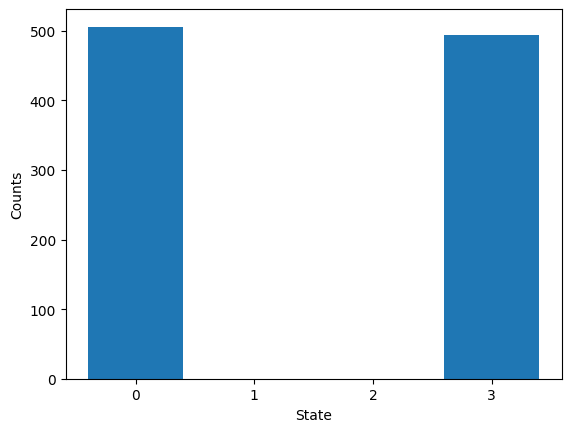

In [9]:
n_measures=1000
sol=np.zeros(n_measures)
for i in range(1000):
    reg=quantum_reg(2)
    reg.h(0)
    for j in range(reg.length-1):
        reg.cx(j,j+1)
    qb0=reg.measure(0)
    qb1=reg.measure(1)
    sol[i]=int(''.join(np.array([qb1,qb0],dtype=str).tolist()), 2)
    
labels, counts = np.unique(sol, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xticks(np.arange(0,2**2));
plt.ylabel('Counts')
plt.xlabel('State')
plt.show()


## Other Quantum Gates

In [12]:
def toffoli(reg:quantum_reg,c1:int,c2:int,t:int):
    matrix=np.diag(np.ones(2**reg.length))
    matrix=matrix.dot(reg.h(t))
    matrix=matrix.dot(reg.cx(c2,t))
    matrix=matrix.dot(reg.t(t,1))
    matrix=matrix.dot(reg.cx(c1,t))
    matrix=matrix.dot(reg.t(t))
    matrix=matrix.dot(reg.cx(c2,t))
    matrix=matrix.dot(reg.t(t,1))
    matrix=matrix.dot(reg.cx(c1,t))
    matrix=matrix.dot(reg.t(t))
    matrix=matrix.dot(reg.t(c2))
    matrix=matrix.dot(reg.cx(c1,c2))
    matrix=matrix.dot(reg.h(t))
    matrix=matrix.dot(reg.t(c2,1))
    matrix=matrix.dot(reg.t(c1))
    matrix=matrix.dot(reg.cx(c1,c2))
    
    return matrix

def ccz(reg:quantum_reg, control1:int,control2:int, target:int):
    matrix=reg.cx(control1,target)
    matrix=matrix.dot(reg.t(target,1))
    matrix=matrix.dot(reg.cx(control2,target))
    matrix=matrix.dot(reg.t(target))
    matrix=matrix.dot(reg.cx(control1,target))
    matrix=matrix.dot(reg.t(target,1))
    matrix=matrix.dot(reg.cx(control2,target))
    matrix=matrix.dot(reg.t(target))
    matrix=matrix.dot(reg.t(control1))
    matrix=matrix.dot(reg.cx(control2,control1))
    matrix=matrix.dot(reg.t(control1,1))
    matrix=matrix.dot(reg.cx(control2,control1))
    matrix=matrix.dot(reg.t(control2))
    
    return matrix

def cccz(reg:quantum_reg, control1:int,control2:int,control3:int, target:int):
    theta=np.pi/8
    #--------------------------#
    matrix=reg.p(control1,theta)
    
    #--------------------------------#
    matrix=matrix.dot(reg.cx(control1,control2))
    matrix=matrix.dot(reg.p(control2,theta,1))
    matrix=matrix.dot(reg.cx(control1,control2))
    matrix=matrix.dot(reg.p(control2,theta))
    #--------------------------------#
    matrix=matrix.dot(reg.cx(control2,control3))
    matrix=matrix.dot(reg.p(control3,theta,1))
    matrix=matrix.dot(reg.cx(control1,control3))
    matrix=matrix.dot(reg.p(control2,theta,0))
    matrix=matrix.dot(reg.cx(control2,control3))
    matrix=matrix.dot(reg.p(control3,theta,1))
    matrix=matrix.dot(reg.cx(control1,control3))
    matrix=matrix.dot(reg.p(control2,theta,0))
    
    #---------------------------------#    
    matrix=matrix.dot(reg.cx(control3,target))
    matrix=matrix.dot(reg.p(target,theta,1))
    matrix=matrix.dot(reg.cx(control1,target))    
    matrix=matrix.dot(reg.p(target,theta))
    matrix=matrix.dot(reg.cx(control2,target))  
    matrix=matrix.dot(reg.p(target,theta,1)) 
    matrix=matrix.dot(reg.cx(control1,target))
    matrix=matrix.dot(reg.p(target,theta))
    
    matrix=matrix.dot(reg.cx(control3,target))
    matrix=matrix.dot(reg.p(target,theta,1))
    matrix=matrix.dot(reg.cx(control1,target))    
    matrix=matrix.dot(reg.p(target,theta))
    matrix=matrix.dot(reg.cx(control2,target))  
    matrix=matrix.dot(reg.p(target,theta,1)) 
    matrix=matrix.dot(reg.cx(control1,target))
    matrix=matrix.dot(reg.p(target,theta))
    
    return matrix

def FADDa(reg:quantum_reg, a:int):
    n=reg.length
    conj=0
    if a<0:conj=1;a=np.abs(a)
    binary=np.flip(np.asarray([*(format(a, 'b').zfill(n))],dtype=int));
    matrix=np.diag(np.ones(2**n))
    for i in range(n):
        for j in range(n-i):
            if binary[j]==1:
                matrix=matrix.dot(reg.p(i,2*np.pi/(2**(n-i-j)),conj));            
    return matrix

# Grover's Algorithm Implementation 


In [10]:

#grover_oracle_2qbit: method that applies an oracle to a given quantum register for a certain specified state.
# This method applies a grover's oracle to a 2 qbit quantum register.
# Parameters:
# reg: quantum register to which the grover's oracle matrix is going to be applied (type:quantum_reg)
# state: List of string with the states which want to be found with grover's algorithm. 
# return: an array with the matrix corresponding to the grover's oracle gate matrix representation.

def grover_oracle_2qbit(reg:quantum_reg,states:list):
    matrix=np.diag([1,1,1,1])
    for state in states:
        binary=np.array([*(state)],dtype=int)
        positions=np.where(binary==0)[0];
        for i in range(0,np.size(positions)):
            pos=(np.size(binary)-1)-positions[i]
            matrix=matrix.dot(reg.x(pos))
        matrix=matrix.dot(reg.cz(0,1))
        for i in range(np.size(positions)):
            pos=(np.size(binary)-1)-positions[i]
            matrix=matrix.dot(reg.x(pos))
    
    return matrix

#grover_amplification_2qbit: method that applies a  grover's amplification matrix to a given 2 qbit quantum register for a certain specified state.
# This method applies a grover's amplification gate to a 2 qbit quantum register.
# Parameters:
# reg: quantum register to which the grover's amplification matrix is going to be applied (type:quantum_reg)
# return: an array with the matrix corresponding to the grover's amplification gate matrix representation.

def grover_amplification_2qbit(reg:quantum_reg):
    matrix=np.diag([1,1,1,1])
    for qb in range(reg.length):
        matrix=matrix.dot(reg.h(qb));
    for qb in range(reg.length):
        matrix=matrix.dot(reg.x(qb));
        
    matrix=matrix.dot(reg.cz(1,0))
    
    for qb in range(reg.length):
        matrix=matrix.dot(reg.x(qb));
    for qb in range(reg.length):
        matrix=matrix.dot(reg.h(qb));
        
    return matrix 


In [11]:

#grover_oracle_3qbit: method that applies an oracle to a given quantum register for a certain specified state.
# This method applies a grover's oracle to a 3 qbit quantum register.
# Parameters:
# reg: quantum register to which the grover's oracle matrix is going to be applied (type:quantum_reg)
# state: List of string with the states which want to be found with grover's algorithm. 
# return: an array with the matrix corresponding to the grover's oracle gate matrix representation.
def grover_oracle_3qbit(reg:quantum_reg,values:list):
    matrix=np.diag(np.ones(2**3))
    for state in values:
        binary=np.array([*(state)],dtype=int)
        positions=np.where(binary==0)[0];
        for i in range(0,np.size(positions)):
            pos=(np.size(binary)-1)-positions[i]
            matrix=matrix.dot(reg.x(pos))
        matrix=matrix.dot(ccz(reg,2,1,0))
        for i in range(np.size(positions)):
            pos=(np.size(binary)-1)-positions[i]
            matrix=matrix.dot(reg.x(pos))
    
    return matrix

#grover_amplification_3qbit: method that applies a  grover's amplification matrix to a given 3 qbit quantum register for a certain specified state.
# This method applies a grover's amplification gate to a 3 qbit quantum register.
# Parameters:
# reg: quantum register to which the grover's amplification matrix is going to be applied (type:quantum_reg)
# return: an array with the matrix corresponding to the grover's amplification gate matrix representation.
def grover_amplification_3qbit(reg:quantum_reg):
    matrix=np.diag(np.ones(2**3))
    for qb in range(reg.length):
        matrix=matrix.dot(reg.h(qb));
    for qb in range(reg.length):
        matrix=matrix.dot(reg.x(qb));
        
    matrix=matrix.dot(ccz(reg,2,1,0))
    
    for qb in range(reg.length):
        matrix=matrix.dot(reg.x(qb));
    for qb in range(reg.length):
        matrix=matrix.dot(reg.h(qb));
        
    return matrix 

In [577]:
#grover_oracle_4qbit: method that applies an oracle to a given quantum register for a certain specified state.
# This method applies a grover's oracle to a 4 qbit quantum register.
# Parameters:
# reg: quantum register to which the grover's oracle matrix is going to be applied (type:quantum_reg)
# state: List of string with the states which want to be found with grover's algorithm. 
# return: an array with the matrix corresponding to the grover's oracle gate matrix representation.
def grover_oracle_4qbit(reg:quantum_reg,values:list):
    matrix=np.diag(np.ones(2**4))
    for state in values:
        binary=np.array([*(state)],dtype=int)
        positions=np.where(binary==0)[0];
        for i in range(0,np.size(positions)):
            pos=(np.size(binary)-1)-positions[i]
            matrix=matrix.dot(reg.x(pos))
        matrix=matrix.dot(cccz(reg,3,2,1,0))
        #matrix=matrix.dot(cnz(reg,[3,2,1],0))
        
        for i in range(np.size(positions)):
            pos=(np.size(binary)-1)-positions[i]
            matrix=matrix.dot(reg.x(pos))
    
    return matrix

#grover_amplification_4qbit: method that applies a  grover's amplification matrix to a given 4 qbit quantum register for a certain specified state.
# This method applies a grover's amplification gate to a 4 qbit quantum register.
# Parameters:
# reg: quantum register to which the grover's amplification matrix is going to be applied (type:quantum_reg)
# return: an array with the matrix corresponding to the grover's amplification gate matrix representation.
def grover_amplification_4qbit(reg:quantum_reg):
    matrix=np.diag(np.ones(2**4))
    for qb in range(reg.length):
        matrix=matrix.dot(reg.h(qb));
    for qb in range(reg.length):
        matrix=matrix.dot(reg.x(qb));
        
    matrix=matrix.dot(cccz(reg,3,2,1,0))
    #matrix=matrix.dot(cnz(reg,[3,2,1],0))
    for qb in range(reg.length):
        matrix=matrix.dot(reg.x(qb));
    for qb in range(reg.length):
        matrix=matrix.dot(reg.h(qb));
        
    return matrix 

## Example 1: Grover's Algortihm 4 Qbit System 

In this example Grover's Algorithm is applied to a 4 qbit system, looking for the state $|1100\rangle$

In [588]:
reg=quantum_reg(4)
reg.tensor

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [589]:
for qb in range(reg.length):
    reg.h(qb);

reg.tensor

array([0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
       0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
       0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])

In [590]:
grover_oracle_4qbit(reg,['1100'])
reg.tensor

array([ 0.1767767 -1.76776695e-01j,  0.1767767 -1.76776695e-01j,
        0.25      +0.00000000e+00j,  0.25      +0.00000000e+00j,
        0.23096988+9.56708581e-02j,  0.23096988+9.56708581e-02j,
        0.23096988+9.56708581e-02j,  0.23096988+9.56708581e-02j,
        0.23096988-9.56708581e-02j,  0.23096988-9.56708581e-02j,
        0.23096988-9.56708581e-02j,  0.23096988-9.56708581e-02j,
       -0.25      -8.63614149e-18j,  0.25      -3.06161700e-17j,
        0.1767767 +1.76776695e-01j,  0.1767767 +1.76776695e-01j])

In [591]:
grover_amplification_4qbit(reg)
reg.tensor

array([-0.1875    -1.50888348e-01j, -0.20508154-1.50888348e-01j,
       -0.19993202+8.83883476e-02j, -0.19993202+1.07943857e-16j,
       -0.08838835+8.83883476e-02j, -0.08838835+8.11058372e-02j,
       -0.1875    +8.32388351e-02j, -0.15088835+8.32388351e-02j,
       -0.15603786-2.51708718e-01j, -0.15603786-6.76495125e-02j,
       -0.25514951-1.21559206e-01j, -0.21853786-1.21559206e-01j,
       -0.50856695+1.24320230e-02j, -0.06420872+1.24320230e-02j,
       -0.19435823+2.51708718e-01j, -0.19435823+1.63320371e-01j])

In [592]:
grover_oracle_4qbit(reg,['1100'])
reg.tensor

array([-0.2392767 +2.58883476e-02j, -0.25170872+3.83203706e-02j,
       -0.19993202+8.83883476e-02j, -0.19993202+1.07943857e-16j,
       -0.11548494+4.78354290e-02j, -0.11269805+4.11072667e-02j,
       -0.20508154+5.14951252e-03j, -0.17125678+1.91601853e-02j,
       -0.24048494-1.72835429e-01j, -0.17004853-2.78689609e-03j,
       -0.28224611-1.46645710e-02j, -0.24842135-2.86752437e-02j,
        0.50856695-1.24320230e-02j, -0.06420872+1.24320230e-02j,
       -0.31541696+4.05529186e-02j, -0.25291696-2.19470814e-02j])

In [593]:
grover_amplification_4qbit(reg)
reg.tensor

array([0.05652013+0.06665341j, 0.04884563+0.06577911j,
       0.12768083-0.05920095j, 0.13207621-0.00818664j,
       0.1767626 +0.04050314j, 0.17712474+0.00930292j,
       0.11340824-0.00818664j, 0.15992693-0.00636602j,
       0.07594223+0.12281723j, 0.13404684+0.04050314j,
       0.0604233 -0.07068664j, 0.09703495-0.07083665j,
       0.83188464-0.01658543j, 0.23887061+0.01991431j,
       0.02856917-0.13292473j, 0.10143033-0.05799271j])

In [594]:
grover_oracle_4qbit(reg,['1100'])
reg.tensor

array([ 0.08709684+0.00716531j,  0.08105193+0.01197378j,
        0.12768083-0.05920095j,  0.13207621-0.00818664j,
        0.14780746+0.10506414j,  0.16008185+0.07637748j,
        0.10790844+0.03583598j,  0.15018939+0.05531995j,
        0.11716159+0.08440649j,  0.13934302-0.01387748j,
        0.02877324-0.08842894j,  0.06254059-0.1025782j ,
       -0.83188464+0.01658543j,  0.23887061+0.01991431j,
        0.11419343-0.07379052j,  0.11272911+0.03071504j])

In [595]:
grover_amplification_4qbit(reg)
reg.tensor

array([-0.06624465-2.81737745e-04j, -0.06707852+7.94240824e-03j,
       -0.0033752 +1.22658737e-01j, -0.00283449-1.81193586e-02j,
        0.01130418+8.85205005e-02j,  0.02086874+4.66054555e-02j,
       -0.02738787+2.30327487e-02j,  0.04725952+3.69902164e-02j,
       -0.02061384-2.82243671e-01j, -0.00133015+2.36153386e-02j,
       -0.09491607-9.69344684e-02j, -0.04860444-1.16292469e-01j,
       -0.90736749-3.30635233e-03j,  0.11326601+7.34209990e-03j,
        0.03171821+7.88960018e-02j,  0.03971613-1.57206310e-02j])

## Example 2: Grover's Algortihm 2 Qbit System 

In this example Grover's Algorithm is applied to a 2 qbit system, looking for the state $|10\rangle$

In [1223]:
reg=quantum_reg(2)
reg.tensor

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [1224]:
for qb in range(reg.length):
    reg.h(qb);

reg.tensor

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

In [1225]:
grover_oracle_2qbit(reg,['10'])
reg.tensor

array([ 0.5+0.000000e+00j,  0.5+0.000000e+00j, -0.5+6.123234e-17j,
        0.5-6.123234e-17j])

In [1226]:
grover_amplification_2qbit(reg)
reg.tensor

array([ 0.+6.1232340e-17j,  0.+0.0000000e+00j, -1.+3.0616170e-16j,
        0.-1.2246468e-16j])

## Example 3: Grover's Algortihm 3 Qbit System 

In this example Grover's Algorithm is applied to a 3 qbit system, looking for the state $|101\rangle$

In [1240]:
reg=quantum_reg(3)
for qb in range(reg.length):
    reg.h(qb);
print(reg.tensor)

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


In [1241]:
grover_oracle_3qbit(reg,['101']);
print(reg.tensor)

[ 0.35355339-6.79815537e-33j  0.35355339+0.00000000e+00j
  0.35355339+6.79815537e-33j  0.35355339+0.00000000e+00j
  0.35355339+0.00000000e+00j -0.35355339+4.32978028e-17j
  0.35355339+0.00000000e+00j  0.35355339-4.32978028e-17j]


In [1242]:
grover_amplification_3qbit(reg)
reg.tensor

array([-0.1767767 +1.20791053e-16j, -0.1767767 +7.74932501e-17j,
       -0.1767767 +7.74932501e-17j, -0.1767767 +4.63319213e-17j,
       -0.1767767 +7.74932501e-17j, -0.88388348+4.55037001e-16j,
       -0.1767767 +4.63319213e-17j, -0.1767767 +3.03411851e-18j])

In [1243]:
grover_oracle_3qbit(reg,['101'])
reg.tensor

array([-0.1767767 +1.11022302e-16j, -0.1767767 +8.32667268e-17j,
       -0.1767767 +7.74932501e-17j, -0.1767767 +2.77555756e-17j,
       -0.1767767 +6.93889390e-17j,  0.88388348-5.09035914e-16j,
       -0.1767767 +4.16333634e-17j, -0.1767767 +3.71911286e-17j])

In [1244]:
grover_amplification_3qbit(reg)
reg.tensor

array([-0.08838835+1.55530891e-16j, -0.08838835+1.25153201e-16j,
       -0.08838835+1.25153201e-16j, -0.08838835+9.86751697e-17j,
       -0.08838835+1.25153201e-16j,  0.97227182-9.46157877e-16j,
       -0.08838835+9.86751697e-17j, -0.08838835+1.46802102e-16j])

## Other Stuff For Later

In [220]:
reg=quantum_reg(3)
reg.tensor

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [221]:
toffoli(reg,2,1,0);

In [849]:
reg=quantum_reg(5)

for i in range(3):
    reg.h(i);

reg.tensor;

In [850]:
reg.cx(1,2)
reg.cx(1,0)
toffoli(reg,0,2,3)
reg.cx(1,0)
reg.x(0)
toffoli(reg,0,3,4)
reg.x(0)
reg.cx(2,4)
reg.cx(0,4)
reg.cx(1,2)

array([[1.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [847]:
reg.cx(1,5)
reg.cx(2,5)
reg.cx(1,7)
reg.cx(0,7)
toffoli(reg,3,5,7)
reg.cx()

IndexError: index -6 is out of bounds for axis 0 with size 5

In [851]:
reg.icft(3)

array([[ 3.53553391e-01+0.j        ,  3.53553391e-01+0.j        ,
         3.53553391e-01+0.j        , ...,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ],
       [ 3.53553391e-01+0.j        ,  2.50000000e-01-0.25j      ,
         2.16489014e-17-0.35355339j, ...,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ],
       [ 3.53553391e-01+0.j        ,  2.16489014e-17-0.35355339j,
        -3.53553391e-01+0.j        , ...,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ],
       ...,
       [ 0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        , ...,  2.50000000e-01-0.25j      ,
        -2.16489014e-17+0.35355339j, -2.50000000e-01-0.25j      ],
       [ 0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        , ..., -2.16489014e-17+0.35355339j,
        -3.53553391e-01+0.j        

In [852]:
np.sqrt(reg.tensor*np.conj(reg.tensor))

array([3.75000000e-01+0.j, 5.17766953e-02+0.j, 1.25000000e-01+0.j,
       3.01776695e-01+0.j, 1.25000000e-01+0.j, 3.01776695e-01+0.j,
       1.25000000e-01+0.j, 5.17766953e-02+0.j, 2.50000000e-01+0.j,
       9.56708581e-02+0.j, 1.76776695e-01+0.j, 2.30969883e-01+0.j,
       0.00000000e+00+0.j, 2.30969883e-01+0.j, 1.76776695e-01+0.j,
       9.56708581e-02+0.j, 3.75000000e-01+0.j, 5.17766953e-02+0.j,
       1.25000000e-01+0.j, 3.01776695e-01+0.j, 1.25000000e-01+0.j,
       3.01776695e-01+0.j, 1.25000000e-01+0.j, 5.17766953e-02+0.j,
       5.75832039e-17+0.j, 5.31999435e-17+0.j, 4.07174740e-17+0.j,
       2.20361381e-17+0.j, 0.00000000e+00+0.j, 2.20361381e-17+0.j,
       4.07174740e-17+0.j, 5.31999435e-17+0.j])

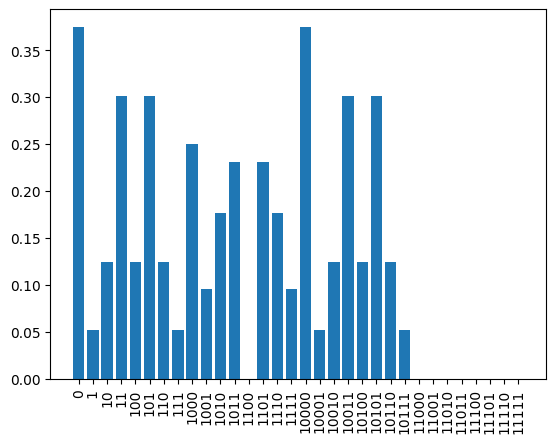

In [853]:
l = np.arange(0,2**reg.length)
x=["{0:b}".format(i) for i in l]
#x= np.arange(0,2**reg.length)
plt.bar(x, height=np.sqrt(reg.tensor*np.conj(reg.tensor)).real);
plt.xticks(rotation='vertical');

In [503]:
np.sqrt(reg.tensor*np.conj(reg.tensor)).real[:8]

array([5.00000000e-01, 1.35299025e-01, 0.00000000e+00, 3.26640741e-01,
       7.85046229e-17, 3.26640741e-01, 0.00000000e+00, 1.35299025e-01])

In [540]:
for i in range(2**reg.length):
    values=np.sqrt(reg.tensor*np.conj(reg.tensor)).real
    if values[i]!=0:
        phase=i/2**reg.length
        phase=phase.as_integer_ratio()
        print(i, phase)

0 (0, 1)
1 (1, 32)
3 (3, 32)
4 (1, 8)
5 (5, 32)
7 (7, 32)
16 (1, 2)
17 (17, 32)
19 (19, 32)
20 (5, 8)
21 (21, 32)
23 (23, 32)


In [61]:
for qb in range(reg.length):
    reg.h(qb)
    reg.z(qb)
reg.cz(0,1)
for qb in range(reg.length):
    reg.h(qb)

In [62]:
reg.tensor

array([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

In [63]:
reg=quantum_reg(3)
reg.tensor
for qb in range(reg.length):
    reg.h(qb);

In [64]:
reg.cz(0,2);
reg.cz(1,2);
for qb in range(reg.length):
    reg.h(qb)
    reg.x(qb)

reg.h(2)    
reg.h(2)
reg.v(1,2)
reg.cx(0,1)
reg.v(1,2)
reg.v(1,2)
reg.v(1,2)
reg.cx(0,1)
reg.v(0,2)
reg.h(2)
reg.h(2) 

for qb in range(reg.length):
    reg.x(qb)
    reg.h(qb)

In [360]:
reg=quantum_reg(2)
for qb in range(reg.length):
    reg.h(qb);

reg.tensor

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

In [17]:
15*15
a=7

In [13]:


def gcd(a, b):
    while b != 0:
        t = copy.copy(b)
        b = a% b
        a = copy.copy(t)
    return a    


In [75]:
def adder(state:quantum_reg,a:int):
    n=2**state.length
    matrix=np.diag(np.ones(n))
    for i in range(n):
        matrix=matrix.dot(state.Rz(i, 2*np.pi*a/(2^(n-i))))
        
    return matrix

In [110]:
n=35
n.bit_length()

6

In [779]:
reg=quantum_reg(4)
#reg.x(1)
#reg.x(0)
print(reg.tensor)
reg.cft(4);
FADDa(reg,8);
print(FADDa(reg,-3))
reg.icft(4);
print(reg.tensor);

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[[ 1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  3.82683432e-01-9.23879533e-01j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.000000

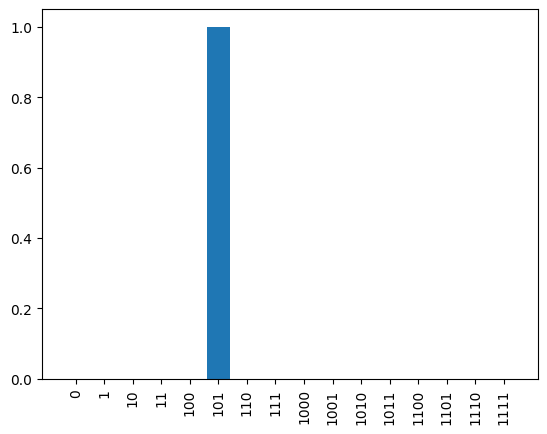

In [780]:
l = np.arange(0,2**reg.length)
x=["{0:b}".format(i) for i in l]
#x= np.arange(0,2**reg.length)
plt.bar(x, height=np.sqrt(reg.tensor*np.conj(reg.tensor)).real);
plt.xticks(rotation='vertical');

In [781]:
-8%16

8

In [772]:
def cz(reg:quantum_reg,c:int,t:int):
    matrix=reg.s(t);
    matrix=matrix.dot(reg.cx(c,t));
    matrix=matrix.dot(reg.s(t,1));
    matrix=matrix.dot(reg.cx(c,t));
    return matrix

In [773]:
reg=quantum_reg(2)

In [774]:
cz(reg,0,1)

array([[1.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
        0.000000e+00+0.j],
       [0.000000e+00+0.j, 6.123234e-17-1.j, 0.000000e+00+0.j,
        0.000000e+00+0.j],
       [0.000000e+00+0.j, 0.000000e+00+0.j, 1.000000e+00+0.j,
        0.000000e+00+0.j],
       [0.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
        6.123234e-17+1.j]])

In [768]:
reg.cz(0,1)

array([[ 1.00000000e+00+0.j,  0.00000000e+00+0.j,  1.01465364e-17+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  1.00000000e+00+0.j,  0.00000000e+00+0.j,
         1.01465364e-17+0.j],
       [ 1.01465364e-17+0.j,  0.00000000e+00+0.j,  1.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j, -1.01465364e-17+0.j,  0.00000000e+00+0.j,
        -1.00000000e+00+0.j]])

In [675]:
reg.z(0)

array([[ 1.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
         0.+0.0000000e+00j],
       [ 0.+0.0000000e+00j, -1.+1.2246468e-16j,  0.+0.0000000e+00j,
         0.+0.0000000e+00j],
       [ 0.+0.0000000e+00j,  0.+0.0000000e+00j,  1.+0.0000000e+00j,
         0.+0.0000000e+00j],
       [ 0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
        -1.+1.2246468e-16j]])

In [1213]:
def cFADDa(reg:quantum_reg, a:int, c:int):
    n=reg.length
    reg_dummy=quantum_reg(n)
    matrix_o=FADDa(reg_dummy, a)
    matrix_sqrt=sqrtm(matrix_o)
    matrix_cnot=np.diag(np.ones(2**reg.length))
    for i in range(n):
        matrix_cnot=matrix_cnot.dot(reg_dummy.cx(c,i))
    matrix_resp=np.diag(np.ones(2**reg.length));
    matrix_resp=matrix_resp.dot(matrix_sqrt)
    matrix_resp=matrix_resp.dot(matrix_cnot)
    matrix_resp=matrix_resp.dot(np.conjugate(matrix_sqrt))
    return matrix_resp

In [1214]:
reg=quantum_reg(3)

cFADDa(reg,1,2);

In [ ]:
n_count=3
reg= quantum_reg(n_count+4)

def c_2mod15(reg:quantum_reg,power:int):
        reg.swap()

In [922]:
import numpy as np
psi=np.zeros((2,2)) # Create an array of zeros with the right shape. 
psi[0,0]=1

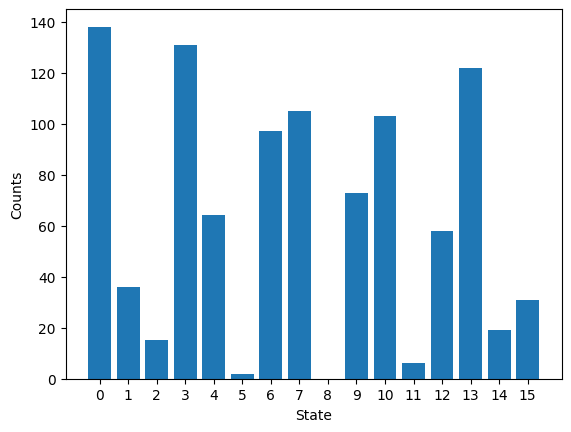

In [1258]:
n_measures=1000
sol=np.zeros(n_measures)
for i in range(1000):
    reg=quantum_reg(4)
    reg.h(3);
    reg.cx(3,2);
    reg.x(0)
    reg.cx(3,0);
    reg.icft(4)
    qb0=reg.measure(0)
    qb1=reg.measure(1)
    qb2=reg.measure(2)
    qb3=reg.measure(3)
    sol[i]=int(''.join(np.array([qb3,qb2,qb1,qb0],dtype=str).tolist()), 2)
    
labels, counts = np.unique(sol, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xticks(np.arange(0,2**4));
plt.ylabel('Counts')
plt.xlabel('State')
plt.show()

In [1265]:
import pandas as pd
rows, measured_phases = [], []
for decimal in sol:
    phase = decimal/(2**4)  
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{bin(int(decimal))}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**1} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

             Register Output          Phase
0    0b1100(bin) = 12.0(dec)  12.0/2 = 0.75
1    0b1111(bin) = 15.0(dec)  15.0/2 = 0.94
2      0b110(bin) = 6.0(dec)   6.0/2 = 0.38
3      0b110(bin) = 6.0(dec)   6.0/2 = 0.38
4    0b1111(bin) = 15.0(dec)  15.0/2 = 0.94
..                       ...            ...
995     0b11(bin) = 3.0(dec)   3.0/2 = 0.19
996   0b1001(bin) = 9.0(dec)   9.0/2 = 0.56
997  0b1010(bin) = 10.0(dec)  10.0/2 = 0.62
998     0b10(bin) = 2.0(dec)   2.0/2 = 0.12
999    0b100(bin) = 4.0(dec)   4.0/2 = 0.25

[1000 rows x 2 columns]


In [17]:
from fractions import Fraction
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

NameError: name 'measured_phases' is not defined

In [ ]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    reg. = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

In [1268]:
n_count = 8  # number of counting qubits
a = 7

In [1271]:
reg=quantum_reg(n_count+4)
for q in range(n_count):
    reg.h(q)
reg.x(n_count)

array([[0.+6.123234e-17j, 0.+0.000000e+00j, 0.+0.000000e+00j, ...,
        0.+0.000000e+00j, 0.+0.000000e+00j, 0.+0.000000e+00j],
       [0.+0.000000e+00j, 0.+6.123234e-17j, 0.+0.000000e+00j, ...,
        0.+0.000000e+00j, 0.+0.000000e+00j, 0.+0.000000e+00j],
       [0.+0.000000e+00j, 0.+0.000000e+00j, 0.+6.123234e-17j, ...,
        0.+0.000000e+00j, 0.+0.000000e+00j, 0.+0.000000e+00j],
       ...,
       [0.+0.000000e+00j, 0.+0.000000e+00j, 0.+0.000000e+00j, ...,
        0.+6.123234e-17j, 0.+0.000000e+00j, 0.+0.000000e+00j],
       [0.+0.000000e+00j, 0.+0.000000e+00j, 0.+0.000000e+00j, ...,
        0.+0.000000e+00j, 0.+6.123234e-17j, 0.+0.000000e+00j],
       [0.+0.000000e+00j, 0.+0.000000e+00j, 0.+0.000000e+00j, ...,
        0.+0.000000e+00j, 0.+0.000000e+00j, 0.+6.123234e-17j]])

In [ ]:
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])

In [1281]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister



In [1277]:
def shors_algorithm(N):
    """Returns the period of N using Shor's algorithm"""
    
    # Step 1: Choose a random integer 'a' less than N
    a = np.random.randint(2, N-1)
    
    # Step 2: Construct a quantum circuit with 2 registers
    # First register has n qubits for the input and the second register has m qubits for the output
    n = int(np.ceil(np.log2(N)))
    m = 2*n
    
    qc = QuantumCircuit(n+m, m)
    
    # Step 3: Apply Hadamard gates to the first register
    qc.h(range(n))
    
    # Step 4: Apply the quantum function f(x) = a^x mod N to the first register
    for i in range(n):
        for j in range(2**i):
            qc.cswap(i, n+j+i, n+j+i+1)
        qc.x(i)
        qc.cx(i, n+i)
        qc.x(i)
    
    # Step 5: Apply inverse quantum Fourier transform to the first register
    for i in range(n//2):
        qc.swap(i, n-i-1)
    for i in range(n):
        for j in range(i):
            qc.cu1(np.pi/float(2**(i-j)), j, n+i)
        qc.h(i)
    
    # Step 6: Measure the first register
    qc.measure(range(n), range(n))
    
    # Step 7: Execute the quantum circuit and obtain the measurement results
    from qiskit import Aer, execute
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend=backend, shots=1).result()
    measured = int(result.get_counts().keys()[0], 2)
    
    # Step 8: Use continued fractions to obtain the period of N
    from fractions import Fraction
    r = 0
    for i in range(1, N):
        x = Fraction(measured, 2**n) + Fraction(i, N)
        frac = x.limit_denominator(N)
        if frac.denominator < N and pow(a, frac.denominator, N) == 1:
            r = frac.denominator
            break
    
    return r,a

In [1307]:
import numpy as np
from math import gcd
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer

def shors_algorithm(N):
    """Returns the period of N using Shor's algorithm"""
    
    # Step 1: Choose a random integer 'a' less than N
    a = np.random.randint(2, N-1)
    
    # Step 2: Construct a quantum circuit with 2 registers
    # First register has n qubits for the input and the second register has m qubits for the output
    n = int(np.ceil(np.log2(N)))
    m = 2*n
    
    # Initialize the quantum registers
    qreg = QuantumRegister(n+m)
    qc = QuantumCircuit(qreg)
    
    # Step 3: Apply Hadamard gates to the first register
    for i in range(n):
        qc.h(qreg[i])
    
    # Step 4: Apply the quantum function f(x) = a^x mod N to the first register
    for i in range(n):
        for j in range(2*i):
            print(i,n+j+i)
            qc.cx(qreg[i], qreg[n+j])
        qc.barrier()
        qc.swap(qreg[i], qreg[n+i])
        qc.barrier()
        qc.x(qreg[i])
        qc.cx(qreg[i], qreg[n+i])
        qc.x(qreg[i])
        qc.barrier()
    
    # Step 5: Apply inverse quantum Fourier transform to the first register
    for i in range(n):
        qc.h(qreg[i])
        for j in range(i):
            qc.cu(np.pi/float(2**(i-j)), qreg[j], qreg[i])
    
    # Step 6: Measure the first register
    creg = ClassicalRegister(n)
    qc.add_register(creg)
    qc.measure(qreg[:n], creg)
    
    # Step 7: Execute the quantum circuit and obtain the measurement results
    backend = BasicAer.get_backend('qasm_simulator')
    result = execute(qc, backend=backend, shots=1).result()
    measured = int(list(result.get_counts())[0], 2)
    
    # Step 8: Use continued fractions to obtain the period of N
    r = gcd(measured, 2**n)
    
    for i in range(1, n):
        x = (a**r)**(2**(n-i)) % N
        if x == 1:
            return r
        r *= 2
        
    return r,a


In [1308]:
shors_algorithm(15)

1 5
1 6
2 6
2 7
2 8
2 9
3 7
3 8
3 9
3 10
3 11
3 12


TypeError: QuantumCircuit.cu() missing 3 required positional arguments: 'gamma', 'control_qubit', and 'target_qubit'

In [1309]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector

def shors_algorithm(N):
    # Step 1: Initialize the registers
    n = N.bit_length()
    qreg = QuantumRegister(2*n, 'q')
    creg = ClassicalRegister(n-1, 'c')
    qc = QuantumCircuit(qreg, creg)

    # Step 2: Apply the Hadamard gates
    for i in range(n):
        qc.h(qreg[i])

    # Step 3: Repeat the controlled-U operations
    for repeat in range(2*n):
        for i in range(n-1):
            qc.cu(1, 2*n-i-2, 2*n-i-1, qreg[i])
        qc.barrier()

    # Step 4: Measure the second register
    for i in range(n):
        qc.measure(qreg[n+i], creg[i])

    # Step 5: Apply the inverse Fourier transform
    for i in range(n):
        qc.h(qreg[i])
        for j in range(i):
            theta = -np.pi/float(2**(i-j))
            qc.cu(np.cos(theta), np.sin(theta), qreg[j], qreg[i])
        qc.barrier()

    # Step 6: Measure the first register
    creg2 = ClassicalRegister(n, 'c2')
    qc.add_register(creg2)
    qc.measure(qreg[:n], creg2)

    # Step 7: Run the circuit and get the result
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1024).result()
    counts = result.get_counts()
    measured = max(counts, key=counts.get)

    # Step 8: Check if the measurement is valid
    x = int(measured, 2)
    if x % 2 != 0:
        x = x + (2 ** (n-1))
    if x % 2 != 0:
        return None
    a = np.gcd(int(N**(1/2)), x // 2)
    if a == 1 or a == N:
        return None
    else:
        return a, N // a

print(shors_algorithm(15))


TypeError: QuantumCircuit.cu() missing 2 required positional arguments: 'control_qubit' and 'target_qubit'

In [28]:
from math import gcd
import numpy as np
from numpy.random import randint
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute

def shors_algorithm(N):
    # Step 1: Initialize registers
    n = int(np.ceil(np.log2(N)))
    qreg = QuantumRegister(2*n)
    creg = ClassicalRegister(n)
    qc = QuantumCircuit(qreg, creg)

    # Step 2: Apply Hadamard gates to the first n qubits
    for i in range(n):
        qc.h(qreg[i])

    # Step 3: Apply controlled unitary gates
    for repeat in range(2*n):
        for i in range(n-1):
            qc.cp(np.pi/float(2**(i+1)), qreg[n+i], qreg[i])
        
        #qc.barrier()

    # Step 4: Measure the second register
    for i in range(n):
        qc.measure(qreg[n+i], creg[i])
    qc.draw( )
    
    # Step 5: Find the period using the continued fractions algorithm
    backend = Aer.get_backend('qasm_simulator')
    shots = 2048
    results = execute(qc, backend=backend, shots=shots).result()
    counts = results.get_counts()

    fractions = []
    for outcome in counts:
        if outcome[0] == '1':
            r = int(outcome[1:], 2)
            fraction = gcd(N, 2**n + r)
            fractions.append(fraction)

    r = 0
    while r == 0:
        a = randint(2, N)
        r = gcd(a, N)
        for i in range(len(fractions)):
            if r != 1 and r != N and r == fractions[i]:
                break
            if i == len(fractions)-1:
                r = 0

    # Step 6: Return the factors
    if r == 1 or r == N:
        return "Failed to find factors"
    else:
        return r, N // r


In [30]:
shors_algorithm(15)


(3, 5)

In [31]:
    N=15
    n = int(np.ceil(np.log2(N)))
    qreg = QuantumRegister(2*n)
    creg = ClassicalRegister(n)
    qc = QuantumCircuit(qreg, creg)

    # Step 2: Apply Hadamard gates to the first n qubits
    for i in range(n):
        qc.h(qreg[i])

    # Step 3: Apply controlled unitary gates
    for repeat in range(2*n):
        for i in range(n-1):
            qc.cp(np.pi/float(2**(i+1)), qreg[n+i], qreg[i])

    # Step 4: Measure the second register
    for i in range(n):
        qc.measure(qreg[n+i], creg[i])
    qc.draw(fold=-1)

┌───┐                                                                                                                                                                                                                                 
q8_0: ┤ H ├─■──────────────────────────■──────────────────────────■──────────────────────────■──────────────────────────■──────────────────────────■──────────────────────────■──────────────────────────■──────────────────────────────────
      ├───┤ │                          │                          │                          │                          │                          │                          │                          │                                  
q8_1: ┤ H ├─┼────────■─────────────────┼────────■─────────────────┼────────■─────────────────┼────────■─────────────────┼────────■─────────────────┼────────■─────────────────┼────────■─────────────────┼────────■─────────────────────────
      ├───┤ │        │                 │        │                 │        │                 │        │                 │        │                 │        │                 │        │                 │        │                         
q8_2: ┤ H ├─┼────────┼────────■────────┼────────┼────────■────────┼────────┼────────■────────┼────────┼────────■────────┼────────┼────────■────────┼────────┼────────■────────┼────────┼────────■────────┼────────┼────────■────────────────
      ├───┤ │        │        │        │        │        │        │        │        │        │        │        │        │        │        │        │        │        │        │        │        │        │        │        │                
q8_3: ┤ H ├─┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────────────
      └───┘ │P(π/2)  │        │        │P(π/2)  │        │        │P(π/2)  │        │        │P(π/2)  │        │        │P(π/2)  │        │        │P(π/2)  │        │        │P(π/2)  │        │        │P(π/2)  │        │       ┌─┐      
q8_4: ──────■────────┼────────┼────────■────────┼────────┼────────■────────┼────────┼────────■────────┼────────┼────────■────────┼────────┼────────■────────┼────────┼────────■────────┼────────┼────────■────────┼────────┼───────┤M├──────
                     │P(π/4)  │                 │P(π/4)  │                 │P(π/4)  │                 │P(π/4)  │                 │P(π/4)  │                 │P(π/4)  │                 │P(π/4)  │                 │P(π/4)  │       └╥┘┌─┐   
q8_5: ───────────────■────────┼─────────────────■────────┼─────────────────■────────┼─────────────────■────────┼─────────────────■────────┼─────────────────■────────┼─────────────────■────────┼─────────────────■────────┼────────╫─┤M├───
                              │P(π/8)                    │P(π/8)                    │P(π/8)                    │P(π/8)                    │P(π/8)                    │P(π/8)                    │P(π/8)                    │P(π/8)  ║ └╥┘┌─┐
q8_6: ────────────────────────■──────────────────────────■──────────────────────────■──────────────────────────■──────────────────────────■──────────────────────────■──────────────────────────■──────────────────────────■────────╫──╫─┤M├
       ┌─┐                                                                                                                                                                                                                          ║  ║ └╥┘
q8_7: ─┤M├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╫──╫──╫─
       └╥┘                                                                                                                                                                                                            

In [1336]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector

def shors_algorithm(N):
    # Step 1: Initialize the registers
    n = N.bit_length()
    qreg = QuantumRegister(2*n, 'q')
    creg = ClassicalRegister(n-1, 'c')
    qc = QuantumCircuit(qreg, creg)

    # Step 2: Apply the Hadamard gates
    for i in range(n):
        qc.h(qreg[i])

    # Step 3: Repeat the controlled-U operations
    for repeat in range(2*n):
        for i in range(n-1):
            qc.cp(1, 2*n-i-2, 2*n-i-1, qreg[i])
        qc.barrier()

    # Step 4: Measure the second register
    for i in range(n):
        qc.measure(qreg[n+i], creg[i])

    # Step 5: Apply the inverse Fourier transform
    for i in range(n):
        qc.h(qreg[i])
        for j in range(i):
            theta = -np.pi/float(2**(i-j))
            qc.cp(np.cos(theta), np.sin(theta), qreg[j], qreg[i])
        qc.barrier()

    # Step 6: Measure the first register
    creg2 = ClassicalRegister(n, 'c2')
    qc.add_register(creg2)
    qc.measure(qreg[:n], creg2)

    # Step 7: Run the circuit and get the result
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1024).result()
    counts = result.get_counts()
    measured = max(counts, key=counts.get)

    # Step 8: Check if the measurement is valid
    x = int(measured, 2)
    if x % 2 != 0:
        x = x + (2 ** (n-1))
    if x % 2 != 0:
        return None
    a = np.gcd(int(N**(1/2)), x // 2)
    if a == 1 or a == N:
        return None
    else:
        return a, N // a

print(shors_algorithm(15))

TypeError: label expects a string or None

In [1367]:
import numpy as np
from math import gcd
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer

def shors_algorithm(N):
    """Returns the period of N using Shor's algorithm"""
    
    # Step 1: Choose a random integer 'a' less than N
    a = np.random.randint(2, N-1)
    
    # Step 2: Construct a quantum circuit with 2 registers
    # First register has n qubits for the input and the second register has m qubits for the output
    n = int(np.ceil(np.log2(N)))
    m = 2*n
    
    # Initialize the quantum registers
    qreg = QuantumRegister(n+m)
    qc = QuantumCircuit(qreg)
    
    # Step 3: Apply Hadamard gates to the first register
    for i in range(n):
        qc.h(qreg[i])
    
    # Step 4: Apply the quantum function f(x) = a^x mod N to the first register
    print(np.size(qreg[:]),n,(2**3)-1,n+m)
    for i in range(n):
        for j in range(2**i):
            qc.cx(qreg[i], qreg[n+j])
        qc.barrier()
        qc.swap(qreg[i], qreg[n+i])
        qc.barrier()
        qc.x(qreg[i])
        qc.cx(qreg[i], qreg[n+i])
        qc.x(qreg[i])
        qc.barrier()
    
    # Step 5: Apply inverse quantum Fourier transform to the first register
    for i in range(n):
        qc.h(qreg[i])
        for j in range(i):
            qc.cp(np.pi/float(2**(i-j)), qreg[j], qreg[i])
    
    # Step 6: Measure the first register
    creg = ClassicalRegister(n)
    qc.add_register(creg)
    qc.measure(qreg[:n], creg)
    
    
    # Step 7: Execute the quantum circuit and obtain the measurement results
    backend = BasicAer.get_backend('qasm_simulator')
    result = execute(qc, backend=backend, shots=1).result()
    measured = int(list(result.get_counts())[0], 2)
    
    # Step 8: Use continued fractions to obtain the period of N
    r = gcd(measured, 2**n)
    
    for i in range(1, n):
        x = (a**r)**(2**(n-i)) % N
        if x == 1:
            return r
        r *= 2
        
    return r

In [14]:
def U(a:int,N:int,reg:quantum_reg,counting_qb:int):
    repetitions=1;
    matrix=np.diag(np.ones(2**reg.length))
    for i in range(counting_qb):
        for j in range(repetitions):
            matrix=matrix.dot(reg.cp(counting_qb,i,2*np.pi*a/((2**j)*N)));
        repetitions*=2  
    return matrix

In [22]:
import pandas as pd
from numpy.random import randint
def Shors(N):
    a=np.random.randint(2, N-1)
    while gcd(a,N)!=1:
        a=np.random.randint(2, N-1)
    
    print(a,N)
    
    n = int(np.ceil(np.log2(N)))
    m = 1
    
    measures=[]
    tot_measures=50
    for k in range(tot_measures):   
        reg=quantum_reg(n+m);
        for i in range(n):
            reg.h(i);
    
        reg.x(n)
    
        U(a,N,reg,n);
    
        reg.icft(n);
    
        value=[]
        for i in range(n):
            value.append(reg.measure(i));
        
        measures.append(int(''.join(np.flip(np.array(value,dtype=str).tolist())), 2))
    
    labels, counts = np.unique(measures, return_counts=True)
    plt.bar(labels, counts, align='center')
    #plt.gca().set_xticks(labels)
    #plt.xticks(np.arange(0,2**(n)));
    plt.ylabel('Counts')
    plt.xlabel('State')
    
    
    print(labels)        
    
    rows = []
    for i in range(len(labels)):
        if counts[i]> tot_measures*0.1:
            phase=labels[i]
            print(phase)
            frac = Fraction(phase/2**n).limit_denominator(N)
            rows.append([phase/2**n, f"{frac.numerator}/{frac.denominator}", frac.denominator])
    # Print as a table
    headers=["Phase", "Fraction", "Guess for r"]
    df = pd.DataFrame(rows, columns=headers)
    print(df)
        
    
    fractions = []
    for i in range(len(labels)):
        if counts[i]> tot_measures*0.1:
            f = Fraction(labels[i]/2**n).limit_denominator(N)
            r= f.denominator
            fraction = gcd(N, 2**(n-1) + r)
            print(fraction)
            fractions.append(fraction)

    r = 0
    evaluations=0
    while r == 0 and evaluations<N:
        a = randint(2, N)
        r = gcd(a, N)
        for i in range(len(fractions)):
            evaluations+=1
            if r != 1 and r != N and r == fractions[i]:
                break
            if i == len(fractions)-1:
                r = 0

    # Step 6: Return the factors
    if r == 1 or r == N or r==0:
        return "Failed to find factors"
    else:
        return r, N // r

In [1586]:
print(shors_algorithm(15))

TypeError: shors_algorithm() missing 1 required positional argument: 'a'

16 21
[ 1  3  5  7  9 11 13 15 27 29 31]
11
13
31
     Phase Fraction  Guess for r
0  0.34375     7/20           20
1  0.40625     7/17           17
2  0.96875    20/21           21
3
3
1


(3, 7)

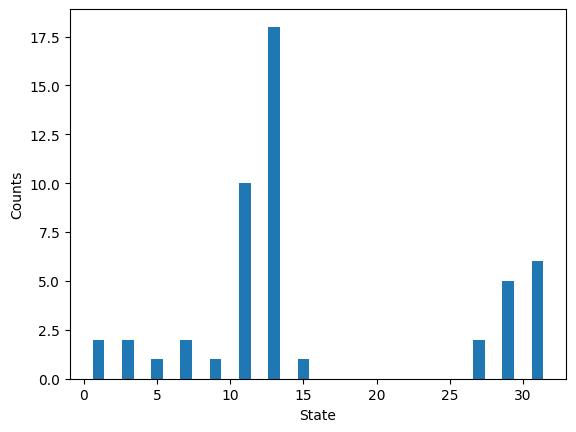

In [27]:
Shors(21)


In [1713]:
3+7+1

11

In [1360]:
4+7+3+1

15

In [1690]:
    # Step 1: Choose a random integer 'a' less than N
    a = np.random.randint(2, N-1)
    
    # Step 2: Construct a quantum circuit with 2 registers
    # First register has n qubits for the input and the second register has m qubits for the output
    n = int(np.ceil(np.log2(N)))-1
    m = 2*n
    
    # Initialize the quantum registers
    qreg = QuantumRegister(n+m)
    qc = QuantumCircuit(qreg)
    
    # Step 3: Apply Hadamard gates to the first register
    for i in range(n):
        qc.h(qreg[i])
    
    # Step 4: Apply the quantum function f(x) = a^x mod N to the first register
    for i in range(n):
        for j in range(2**i):
            qc.cx(qreg[i], qreg[n+j])
        qc.barrier()
        qc.swap(qreg[i], qreg[n+i])
        qc.barrier()
        qc.x(qreg[i])
        qc.cx(qreg[i], qreg[n+i])
        qc.x(qreg[i])
        qc.barrier()
    
    # Step 5: Apply inverse quantum Fourier transform to the first register
    for i in range(n):
        qc.h(qreg[i])
        for j in range(i):
            qc.cp(np.pi/float(2**(i-j)), qreg[j], qreg[i])
    
    # Step 6: Measure the first register
    creg = ClassicalRegister(n)
    qc.add_register(creg)
    qc.measure(qreg[:n], creg)

In [1400]:
from math import gcd
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import UnitaryGate

def shors_algorithm(N, a):
    # Step 1: Initialization
    n = int(np.ceil(np.log2(N)))
    m = 2*n
    qreg = QuantumRegister(m, 'q')
    qc = QuantumCircuit(qreg)
    for i in range(n):
        qc.h(qreg[i])
    qc.x(qreg[m-1])
    qc.h(qreg[m-1])
    qc.barrier()

    # Step 2: Apply the quantum function f(x) = a^x mod N to the first register
    # Construct U_gate
    U_gate = QuantumCircuit(n, name='U_gate')
    for i in range(n):
        U_matrix = np.array([[1, 0], [0, pow(a, 2**i, N) % N]], dtype=complex)
        U_gate.append(UnitaryGate(U_matrix), [i])

    # Apply U_gate to the circuit
    qc.append(U_gate, qargs=list(qreg[:n]))
    qc.barrier()

    # Step 3: Apply the inverse Quantum Fourier Transform to the second register
    for i in range(n):
        qc.h(qreg[n+i])
        for j in range(i):
            qc.cu1(-2*np.pi/float(2**(i-j)), qreg[n+j], qreg[n+i])
        qc.barrier()

    # Step 4: Measure the second register
    creg = ClassicalRegister(n, 'c')
    qc.add_register(creg)
    qc.measure(qreg[n:n+n], creg)

    # Step 5: Classical post-processing
    backend = Aer.get_backend('statevector_simulator')
    results = execute(qc, backend).result()
    counts = results.get_counts()
    phi_estimate = 0
    for binary in counts:
        k = int(binary, 2)
        phi = (2*k + 1)/float(2**n)
        frac = gcd(N, int(a**(phi) - 1))
        if frac != 1 and frac != N:
            phi_estimate = phi
            break

    # Return the factors of N
    factor_1 = gcd(int(a**(phi_estimate/2) + 1), N)
    factor_2 = gcd(int(a**(phi_estimate/2) - 1), N)
    return factor_1, factor_2

ImportError: cannot import name 'UnitaryGate' from 'qiskit.circuit.library' (C:\Users\rozog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\qiskit\circuit\library\__init__.py)

In [1399]:
shors_algorithm(15, 7)

NameError: name 'UnitaryGate' is not defined

In [1689]:
int(np.ceil(np.log2(15)))

4

In [1682]:
2**4

16

In [1536]:
16/32

0.5

In [1616]:
27/64

0.421875

In [1683]:
16+2

18

In [1684]:
16+3

19

In [1685]:
16+6

22

In [1686]:
gcd(18,21)

3

In [1687]:
gcd(19,21)

1

In [1688]:
gcd(22,21)

1

In [ ]:
def ncz(reg:quantum_reg,qbits:list):
    n_control=len(control)
    theta=np.pi/2**(n-1)
    for i in range(n_control):
        if i=0:
            reg.p(qbits[i],theta)
        else: 
            for j in range(1,2**(n+1)+1)
                if j%4==0:
                    reg.p(i,theta)
                elif j%2==0:
                    reg.p(i,-theta)
                else 

def phi(reg:quantum_reg,)
                    

In [49]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import numpy as np

# Define the number of qubits and the target phase shift
N = 2
theta = np.pi/2**(N-1)

# Create a quantum circuit with N qubits
qreg = QuantumRegister(N)
circ = QuantumCircuit(qreg)

# Apply Hadamard gates to all qubits
for i in range(N):
    circ.h(qreg[i])

# Apply controlled phase-shift gates
for i in range(N):
    for j in range(i+1, N):
        circ.cp(theta/2**(j-i), qreg[j], qreg[i])

# Apply Hadamard gates to all qubits
for i in range(N):
    circ.h(qreg[i])

# Measure all qubits
creg = ClassicalRegister(N)
circ.add_register(creg)
for i in range(N):
    circ.measure(qreg[i], creg[i])

circ.draw(fold=-1)
# Simulate the circuit and print the results


┌───┐         ┌───┐┌─┐   
q43_0: ┤ H ├─■───────┤ H ├┤M├───
       ├───┤ │P(π/4) ├───┤└╥┘┌─┐
q43_1: ┤ H ├─■───────┤ H ├─╫─┤M├
       └───┘         └───┘ ║ └╥┘
c13: 2/════════════════════╩══╩═
                           0  1

In [50]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend=backend, shots=1024)
result = job.result()
counts = result.get_counts(circ)
print(counts)

{'00': 906, '10': 32, '01': 48, '11': 38}


In [52]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import numpy as np

# Define the number of control qubits and the target qubit
n_controls = 3
target = 4

# Create a quantum circuit with n_controls+1 qubits
qreg = QuantumRegister(n_controls+1)
circ = QuantumCircuit(qreg)

# Apply Hadamard gates to all qubits
for i in range(n_controls+1):
    circ.h(qreg[i])

# Apply controlled phase-shift gates
for i in range(n_controls):
    circ.cu(np.diag([1, np.exp(1j*np.pi/2**(n_controls-i))]), qreg[n_controls], qreg[i])

# Apply multi-controlled Z gate
for i in range(n_controls):
    circ.cx(qreg[i], target)

# Apply controlled phase-shift gates
for i in range(n_controls):
    circ.cu(np.diag([1, np.exp(1j*np.pi/2**(n_controls-i))]), qreg[n_controls], qreg[i])

# Apply inverse multi-controlled Z gate
for i in range(n_controls-1, -1, -1):
    circ.cx(qreg[i], target)

# Apply Hadamard gates to all qubits
for i in range(n_controls+1):
    circ.h(qreg[i])

# Measure all qubits
creg = ClassicalRegister(n_controls+1)
circ.add_register(creg)
for i in range(n_controls+1):
    circ.measure(qreg[i], creg[i])

# Simulate the circuit and print the results
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend=backend, shots=1024)
result = job.result()
counts = result.get_counts(circ)
print(counts)


TypeError: QuantumCircuit.cu() missing 3 required positional arguments: 'gamma', 'control_qubit', and 'target_qubit'

In [571]:
def cnz(reg:quantum_reg,control:list, target:int,conj:int=0):
    
    matrix=np.diag(np.ones(2**reg.length))
    n=len(control)
    theta=np.pi/(2)
    if n>2:
        matrix=matrix.dot(cnz(reg,control[1:],target))
        matrix=matrix.dot(reg.cx(control[0],target))
        matrix=matrix.dot(cnz(reg,control[1:],target,1-conj)) 
        matrix=matrix.dot(reg.cx(control[0],target))
        matrix=matrix.dot(cnz(reg,control[1:],target))   
    else:
        matrix=matrix.dot(reg.cp(control[0],target,theta,conj))
        matrix=matrix.dot(reg.cx(control[-1],control[0]))
        matrix=matrix.dot(reg.cp(control[0],target,theta,1-conj))
        matrix=matrix.dot(reg.cx(control[-1],control[0]))   
        matrix=matrix.dot(reg.cp(control[-1],target,theta,conj))
    return matrix
                      
    


In [574]:
reg=quantum_reg(5)

In [575]:
matrix=cnz(reg,[4,3,2,1],0)
rows, cols = np.nonzero(matrix)

print(matrix[rows, cols])

[ 1.+0.00000000e+00j  1.+0.00000000e+00j  1.+0.00000000e+00j
  1.+0.00000000e+00j  1.+0.00000000e+00j  1.+0.00000000e+00j
  1.+0.00000000e+00j -1.+6.12323400e-16j  1.+0.00000000e+00j
  1.+0.00000000e+00j  1.+0.00000000e+00j  1.+0.00000000e+00j
  1.+0.00000000e+00j  1.+0.00000000e+00j -1.-1.22464680e-16j
  1.-7.34788079e-16j  1.+0.00000000e+00j  1.+0.00000000e+00j
  1.+0.00000000e+00j  1.+0.00000000e+00j  1.+0.00000000e+00j
  1.+0.00000000e+00j -1.+3.67394040e-16j  1.-2.44929360e-16j
  1.+0.00000000e+00j  1.+0.00000000e+00j  1.+0.00000000e+00j
  1.+0.00000000e+00j  1.+0.00000000e+00j  1.+0.00000000e+00j
  1.+0.00000000e+00j -1.+6.12323400e-16j]


In [566]:
reg=quantum_reg(1)
reg.tensor
reg.Ry(0,-np.pi/2)

array([[ 0.70710678+0.j, -0.70710678+0.j],
       [ 0.70710678+0.j,  0.70710678+0.j]])